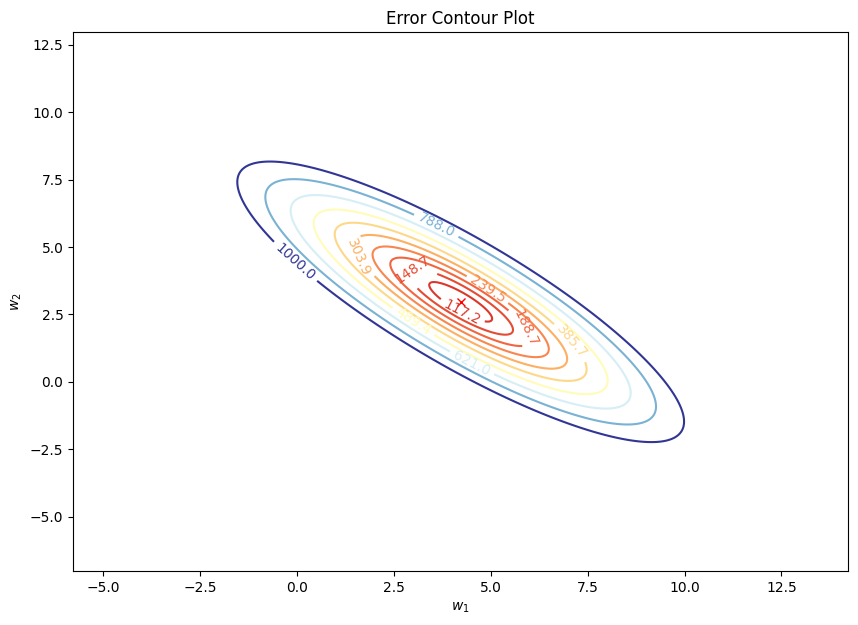

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 최소제곱법으로 w1과 w2 계산 (y = w1 + w2*X 형태 가정)
X_b = np.c_[np.ones((100, 1)), X] # 모든 샘플에 x0 = 1을 추가
best_w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
w1, w2 = best_w[0], best_w[1]

# 오차의 제곱합 계산 함수
def calculate_error(w1, w2):
    y_pred = w1 + w2 * X
    error = (y - y_pred)**2
    return error.sum()

# w1과 w2에 대한 값의 범위 설정
w1s = np.linspace(w1 - 10, w1 + 10, 400)
w2s = np.linspace(w2 - 10, w2 + 10, 400)
w1, w2 = np.meshgrid(w1s, w2s)

# 각 조합에 대한 오차 계산
errors = np.array([calculate_error(w1, w2) for w1, w2 in zip(np.ravel(w1), np.ravel(w2))])
errors = errors.reshape(w1.shape)

# 등고선 플롯 그리기
plt.figure(figsize=(10, 7))
contour = plt.contour(w1, w2, errors, levels=np.logspace(0, 3, 30), cmap='RdYlBu')
plt.clabel(contour, inline=1, fontsize=10)
plt.plot(best_w[0], best_w[1], 'rx') # 최적의 파라미터 위치 표시
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Error Contour Plot')
plt.show()


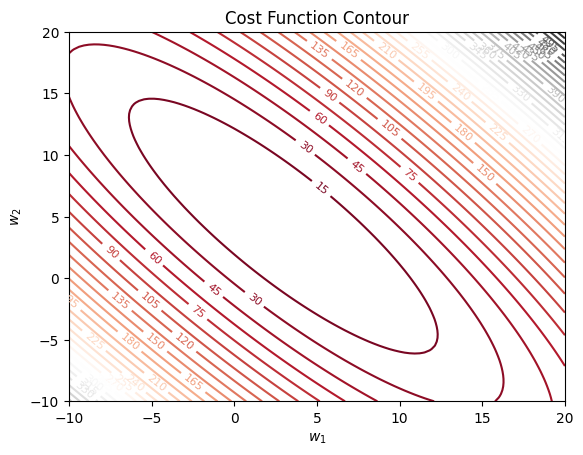

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 데이터 생성
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# 비용 함수 정의
def compute_cost(W1, W2, X, y):
    m = len(y)
    X_b = np.c_[np.ones((m, 1)), X]  # 모든 샘플에 x0 = 1을 추가
    cost = np.zeros((W1.size, W2.size))  # cost 배열의 크기를 수정
    for i in range(W1.size):
        for j in range(W2.size):
            w = np.array([[W1[i]], [W2[j]]])  # w 벡터 생성 방식 수정
            cost[i, j] = (1 / (2 * m)) * np.sum((X_b.dot(w) - y) ** 2)
    return cost

# w1과 w2에 대한 값의 범위 설정
w1 = np.linspace(-10, 20, 100)
w2 = np.linspace(-10, 20, 100)

# 비용 계산
cost = compute_cost(w1, w2, X, y)

# 등고선 플롯 생성
W1, W2 = np.meshgrid(w1, w2)
contours = plt.contour(W1, W2, cost, 50, cmap='RdGy')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Cost Function Contour')
plt.show()


In [49]:
w1 = np.linspace(-10, 20, 100)
w2 = np.linspace(-10, 20, 100)
x1 = np.random.rand(100, 1)
x2 = np.random.rand(100, 1)
w = np.array([w1, w2])
x = np.concatenate((x1.T, x2.T), axis=0).reshape(-1, 2)
# prediction = np.dot(w.T, x)
# print(prediction.shape)
print(w.shape)
print(x.shape)

(2, 100)
(100, 2)


C:\Users\InKyu\AppData\Local\Temp\ipykernel_12144\1971616136.py:31: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_values[i, j] = compute_cost(W, X, y)


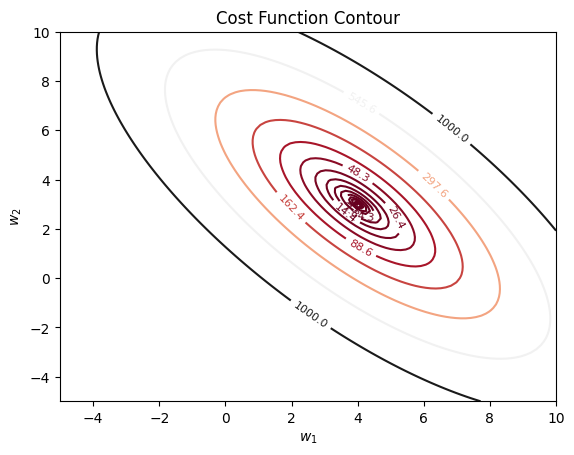

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 데이터 생성
np.random.seed(0)

x1 = np.random.rand(100, 1)
x2 = np.random.rand(100, 1)
y = 3 * x1 + 4 * x2

# X 데이터를 2차원 형태로 조정, 모든 샘플에 x0 = 1 추가
X = np.concatenate((x1, x2), axis=1)  # 열 방향으로 합치기
# w1과 w2의 값 범위 설정
w1 = np.linspace(-5, 10, 100)
w2 = np.linspace(-5, 10, 100)

# 비용 함수 정의
def compute_cost(W, X, y):
    m = len(y)
    pred = X.dot(W)  # 전체 데이터 세트에 대한 예측값 계산
    error = y - pred
    cost = np.dot(error.T, error)

    return cost

# 각 w1, w2 조합에 대한 비용 계산
cost_values = np.zeros((len(w1), len(w2)))
for i in range(len(w1)):
    for j in range(len(w2)):
        W = np.array([w1[i], w2[j]]).reshape(-1, 1)
        cost_values[i, j] = compute_cost(W, X, y)

# 등고선 플롯 생성
W1, W2 = np.meshgrid(w1, w2)
contours = plt.contour(W1, W2, cost_values, levels=np.logspace(-2, 3, 20), cmap='RdGy')
plt.clabel(contours, inline=True, fontsize=8)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Cost Function Contour')
plt.show()

C:\Users\InKyu\AppData\Local\Temp\ipykernel_12144\984100947.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_values[i, j] = compute_cost(W, X, y)


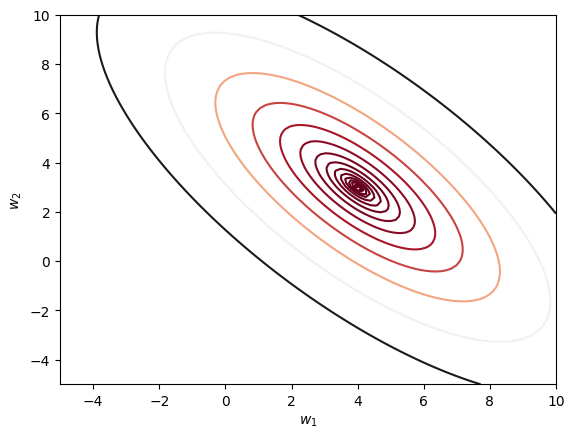

In [105]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

x1 = np.random.rand(100, 1)
x2 = np.random.rand(100, 1)
y = 3 * x1 + 4 * x2

X = np.concatenate((x1, x2), axis=1)  
w1 = np.linspace(-5, 10, 100)
w2 = np.linspace(-5, 10, 100)

def compute_cost(W, X, y):
    m = len(y)
    pred = X.dot(W) 
    error = y - pred
    cost = np.dot(error.T, error)
    return cost

cost_values = np.zeros((len(w1), len(w2)))
for i in range(len(w1)):
    for j in range(len(w2)):
        W = np.array([w1[i], w2[j]]).reshape(-1, 1)
        cost_values[i, j] = compute_cost(W, X, y)

W1, W2 = np.meshgrid(w1, w2)
contours = plt.contour(W1, W2, cost_values, levels=np.logspace(-2, 3, 20), cmap='RdGy')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.show()

C:\Users\InKyu\AppData\Local\Temp\ipykernel_12144\3210891241.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  cost_values[i, j] = compute_cost(W, X, y)


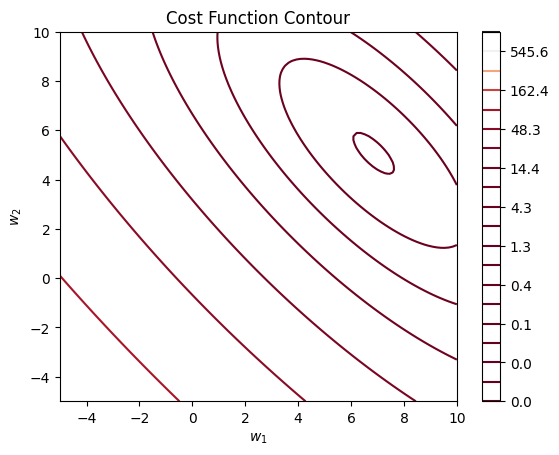

In [106]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

# 데이터 생성
x1 = np.random.rand(100, 1)
x2 = np.random.rand(100, 1)
y = 4 + 3 * x1 + 4 * x2 + np.random.randn(100, 1)  # y 계산에 잡음 추가

X = np.concatenate((np.ones((100, 1)), x1, x2), axis=1)  # 1의 열 추가하여 X 구성

w1 = np.linspace(-5, 10, 100)
w2 = np.linspace(-5, 10, 100)

def compute_cost(W, X, y):
    m = len(y)
    pred = X.dot(W) 
    error = y - pred
    cost = np.dot(error.T, error) / m  # 비용 계산에 m으로 나누어 평균 비용 계산
    return cost

cost_values = np.zeros((len(w1), len(w2)))
for i in range(len(w1)):
    for j in range(len(w2)):
        W = np.array([1, w1[i], w2[j]]).reshape(-1, 1)  # w_0(절편)을 1로 고정
        cost_values[i, j] = compute_cost(W, X, y)

W1, W2 = np.meshgrid(w1, w2)
contours = plt.contour(W1, W2, cost_values, levels=np.logspace(-2, 3, 20), cmap='RdGy')
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.colorbar(contours)
plt.title('Cost Function Contour')
plt.show()
